<a href="https://colab.research.google.com/github/shrr98/sleaf/blob/data_preparation/ML/preprocessing/CAPSTONE_background_masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backround Masking

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! cp /content/drive/MyDrive/Capstone\ asset/dataset_leaves1.zip . 

In [3]:
!unzip dataset_leaves1.zip

Archive:  dataset_leaves1.zip
   creating: dataset_leaves1/
   creating: dataset_leaves1/Muntingia Calabura (Buah Kersen - Seri)/
  inflating: dataset_leaves1/Muntingia Calabura (Buah Kersen - Seri)/MC-S-049.jpg  
  inflating: dataset_leaves1/Muntingia Calabura (Buah Kersen - Seri)/MC-S-018.jpg  
  inflating: dataset_leaves1/Muntingia Calabura (Buah Kersen - Seri)/MC-S-029.jpg  
  inflating: dataset_leaves1/Muntingia Calabura (Buah Kersen - Seri)/MC-S-028.jpg  
  inflating: dataset_leaves1/Muntingia Calabura (Buah Kersen - Seri)/MC-S-023.jpg  
  inflating: dataset_leaves1/Muntingia Calabura (Buah Kersen - Seri)/MC-S-045.jpg  
  inflating: dataset_leaves1/Muntingia Calabura (Buah Kersen - Seri)/MC-S-047.jpg  
  inflating: dataset_leaves1/Muntingia Calabura (Buah Kersen - Seri)/MC-S-052.jpg  
  inflating: dataset_leaves1/Muntingia Calabura (Buah Kersen - Seri)/MC-S-019.jpg  
  inflating: dataset_leaves1/Muntingia Calabura (Buah Kersen - Seri)/MC-S-056.jpg  
  inflating: dataset_leaves1/M

# Segmentation

In [18]:
import cv2

def generate_object_boundingbox(img):
    '''
    generate object bounding box using Canny
    :params img: image containing the object
    :return list: (x_left, y_top, x_right, y_bottom)
    '''
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = cv2.blur(img_gray, (3,3))
    img_canny =  cv2.Canny(img_gray, 100, 100*2)

    contours, _ = cv2.findContours(img_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # generate bounding boxes
    bounding_boxes = []
    for contour in contours:
        polygon = cv2.approxPolyDP(contour, 3, True)
        bounding_boxes.append(cv2.boundingRect(polygon))
    
    # find the outer bounding box
    x_r, y_b = 0, 0
    x_l, y_t, _ = img.shape
    for box in bounding_boxes:
        if box[0] < x_l:
            x_l = box[0]
        if box[1] < y_t:
            y_t = box[1]
        if box[0] + box[2] > x_r:
            x_r = box[0] + box[2]
        if box[1] + box[3] > y_b:
            y_b = box[1] + box[3]
    return x_l, y_t, x_r, y_b


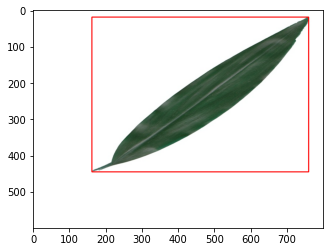

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('dataset_leaves1/Alpinia Galanga (Lengkuas)/AG-S-001.jpg')
x_l, y_t, x_r, y_b = generate_object_boundingbox(img)

# draw the rect
image_copy = np.copy(img)

cv2.rectangle(image_copy, (x_l, y_t), (x_r, y_b), [255,0,0], 2)

_ = plt.imshow(image_copy)

In [20]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_background_mask(filename):
  img = cv2.imread(filename)
  mask = np.zeros(img.shape[:2], np.uint8)
  bgdmodel = np.zeros((1, 65), np.float64)
  fgdmodel = np.zeros((1, 65), np.float64)

  rect = generate_object_boundingbox(img)

  cv2.grabCut(img, mask, rect, bgdmodel, fgdmodel, 5, cv2.GC_INIT_WITH_RECT)

  mask2 = np.where((mask==2)|(mask==0), 1, 0).astype('uint8')

  return mask2

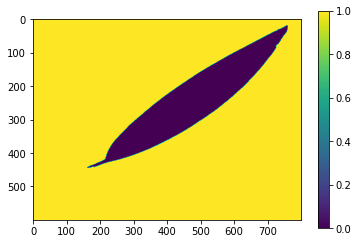

In [21]:
filename='dataset_leaves1/Alpinia Galanga (Lengkuas)/AG-S-001.jpg'
mask = get_background_mask(filename)

plt.imshow(mask)
plt.colorbar()
plt.show()

# Create and Save Masks

In [22]:
source_dir = 'dataset_leaves1'
target_dir = 'dataset_leaves1_mask'

try:
  os.mkdir(target_dir)
except:
  pass

In [25]:
import os
from tqdm.notebook import tqdm
import time

for cls in os.listdir(source_dir):
  src_cls_dir = os.path.join(source_dir, cls)
  
  # create target dir
  dst_cls_dir = os.path.join(target_dir, cls)
  try:
    os.mkdir(dst_cls_dir)
  except:
    pass

  filenames = os.listdir(src_cls_dir)
  for filename in tqdm(filenames, desc=cls):
    src = os.path.join(src_cls_dir, filename)
    dst = os.path.join(dst_cls_dir, filename)
    mask = get_background_mask(src)
    cv2.imwrite(dst, mask)

In [26]:
!zip -r dataset_leaves1_mask.zip dataset_leaves1_mask

  adding: dataset_leaves1_mask/ (stored 0%)
  adding: dataset_leaves1_mask/Ocimum Tenuiflorum (Ruku-Ruku)/ (stored 0%)
  adding: dataset_leaves1_mask/Ocimum Tenuiflorum (Ruku-Ruku)/OT-S-028.jpg (deflated 80%)
  adding: dataset_leaves1_mask/Ocimum Tenuiflorum (Ruku-Ruku)/OT-S-031.jpg (deflated 79%)
  adding: dataset_leaves1_mask/Ocimum Tenuiflorum (Ruku-Ruku)/OT-S-018.jpg (deflated 79%)
  adding: dataset_leaves1_mask/Ocimum Tenuiflorum (Ruku-Ruku)/OT-S-024.jpg (deflated 79%)
  adding: dataset_leaves1_mask/Ocimum Tenuiflorum (Ruku-Ruku)/OT-S-052.jpg (deflated 81%)
  adding: dataset_leaves1_mask/Ocimum Tenuiflorum (Ruku-Ruku)/OT-S-030.jpg (deflated 77%)
  adding: dataset_leaves1_mask/Ocimum Tenuiflorum (Ruku-Ruku)/OT-S-045.jpg (deflated 79%)
  adding: dataset_leaves1_mask/Ocimum Tenuiflorum (Ruku-Ruku)/OT-S-039.jpg (deflated 78%)
  adding: dataset_leaves1_mask/Ocimum Tenuiflorum (Ruku-Ruku)/OT-S-013.jpg (deflated 77%)
  adding: dataset_leaves1_mask/Ocimum Tenuiflorum (Ruku-Ruku)/OT-S-037.

In [27]:
!cp dataset_leaves1_mask.zip /content/drive/MyDrive/Capstone\ asset/

# Background Modification

In [43]:
src_dir = 'dataset_leaves1'
mask_dir = 'dataset_leaves1_mask'
background_list = ['bg.jpg', 'download.jpeg']

def modify_background(filename):
  img = cv2.imread(filename)
  background = cv2.imread(np.random.choice(background_list))
  h, w, _ = img.shape
  background = cv2.resize(background, (w,h))
  background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
  mask_name = filename.replace(src_dir, mask_dir)
  mask = cv2.imread(mask_name)

  fg = img*(1-mask)[:,:,:]
  bg = background*mask[:,:,:]

  new_img = fg+bg
  return new_img

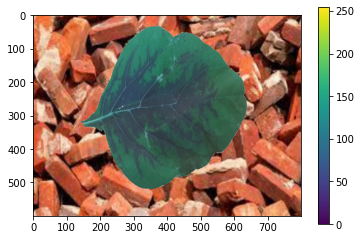

In [46]:
filename = 'dataset_leaves1/Amaranthus Viridis (Bayam Ramping)/AV-S-005.jpg'

new_img = modify_background(filename)

plt.imshow(new_img)
plt.colorbar()
plt.show()